In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

In [2]:
df=pd.read_csv("/Users/varun/Desktop/MAchine learning/Assignments/Assignment_5/country-data.csv")
df.head(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


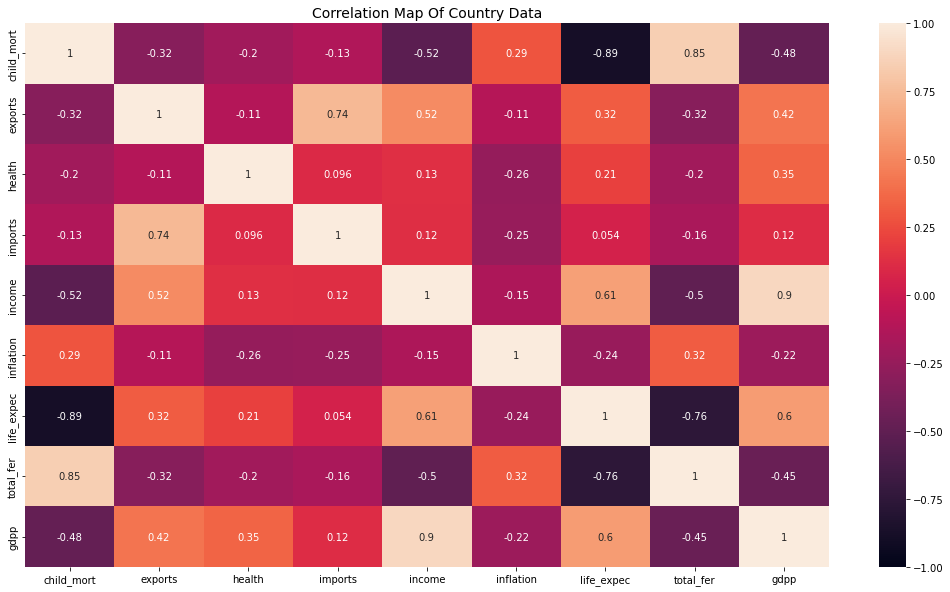

In [4]:
plt.figure(figsize=(18, 10))
sns.heatmap(df.corr(),vmin=-1, vmax=1,annot = True)
plt.title('Correlation Map Of Country Data', fontsize=14);

In [5]:
# from the table we can see GPD and income has a strong correlation 0.9
# child morality and total fertility has second highest correalation 0.85
#let's consider the GPD and child morality columns

In [6]:
df= df[['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp']]
df.head(5)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


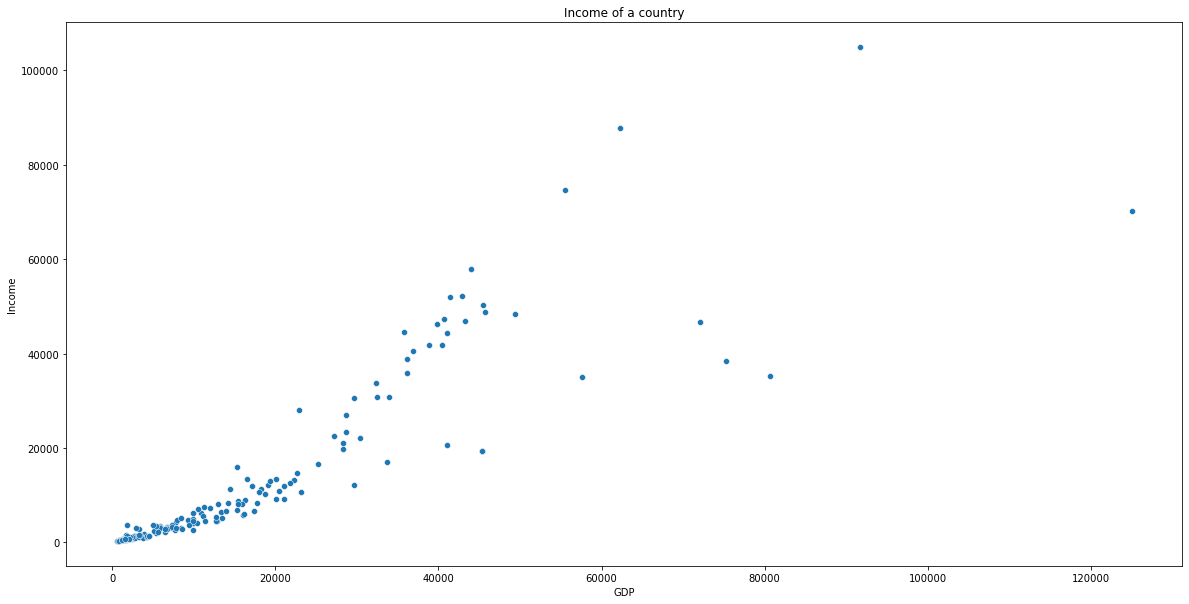

In [7]:
plt.figure(figsize=(20,10))
sns.scatterplot(x='income',y='gdpp',data=df)
plt.title('Income of a country')
plt.xlabel("GDP")
plt.ylabel("Income")
plt.show()

In [24]:
#preprocessing and fit the Model
from sklearn.preprocessing import StandardScaler
pre_fit= StandardScaler().fit_transform(df)
pre_fit

array([[ 1.29153238, -1.13827979,  0.27908825, ...,  1.90288227,
        -0.67917961,  0.        ],
       [-0.5389489 , -0.47965843, -0.09701618, ..., -0.85997281,
        -0.48562324,  0.        ],
       [-0.27283273, -0.09912164, -0.96607302, ..., -0.0384044 ,
        -0.46537561,  0.        ],
       ...,
       [-0.37231541,  1.13030491,  0.0088773 , ..., -0.66120626,
        -0.63775406,  0.        ],
       [ 0.44841668, -0.40647827, -0.59727159, ...,  1.14094382,
        -0.63775406,  0.        ],
       [ 1.11495062, -0.15034774, -0.33801514, ...,  1.6246091 ,
        -0.62954556,  0.        ]])

In [30]:
dbscan = DBSCAN(eps=2,min_samples=5) # given eps and minpts in our tasks!

In [31]:
label=dbscan.fit_predict(pre_fit)
df['label']= label

In [32]:
#no of clusters
set(label)

{-1, 0}

Text(0, 0.5, 'Income Of country')

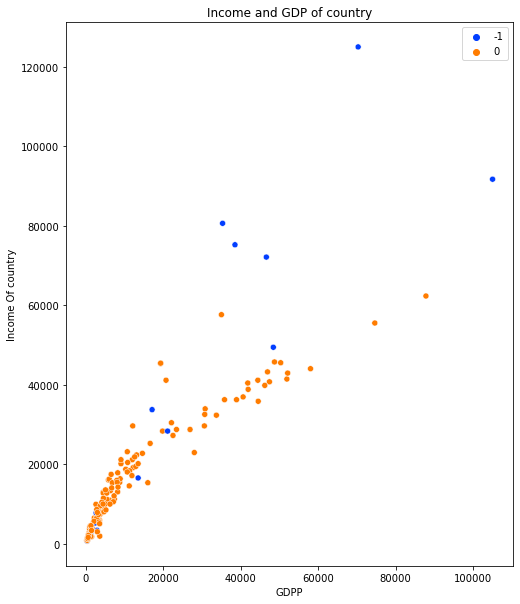

In [34]:
plt.figure(figsize = (8,10))
sns.scatterplot(x= 'gdpp', y='income',data = df, hue = 'label', palette = 'bright',sizes=(200,20))
plt.legend(loc = 1)
plt.title('Income and GDP of country')
plt.xlabel('GDPP')
plt.ylabel('Income Of country')